<a href="https://colab.research.google.com/github/wanichayaporn/Multivariate/blob/main/Chapter4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multidimensional Scaling

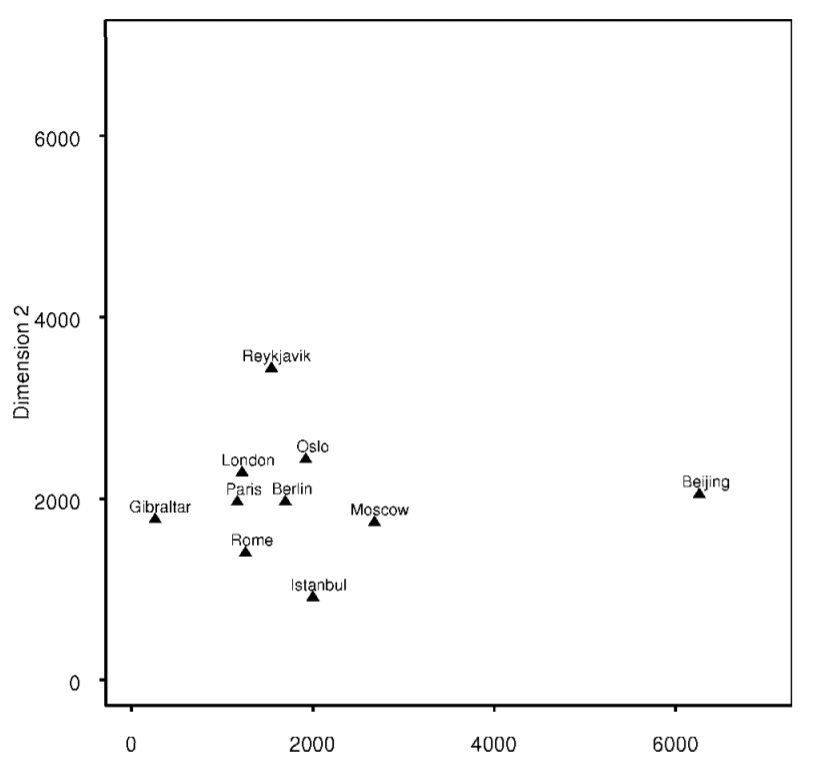

##Example on Iris dataset

In [46]:
import pandas as pd

In [47]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##ลอง plot PCA เพื่อเปรียบเทียบกับ MDS

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=2)

In [50]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [51]:
from matplotlib import pyplot as plt

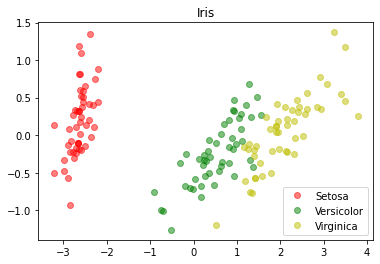

In [52]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris');

#Plot MDS (Mutidimesional Scaling)

Distance ระยะห่าง

In [53]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [54]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

คำนวณระยะห่างระหว่างจุดแบบ Euclidean distance

In [55]:
import numpy as np

In [56]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [57]:
(0.04+0.25)**(1/2) ##คำนวณมือ

0.5385164807134504

In [58]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])  
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

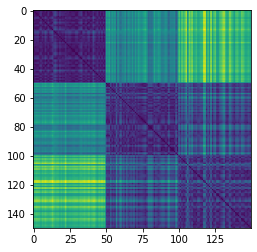

In [59]:
plt.imshow(dis_matrix)

นำ distances_matrix ที่ได้นำไปทำ MDS เพื่อลด Dimention ให้นำไป plot กราฟได้ดีขึ้น

In [60]:
from sklearn.manifold import MDS

In [61]:
mds = MDS(n_components=2)

In [74]:
new_msd = mds.fit_transform(example_df.iloc[:,:-1])

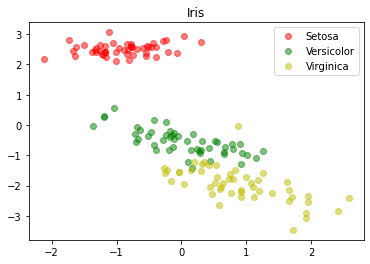

In [75]:
plt.plot(new_msd[:50,0],new_msd[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_msd[50:100,0],new_msd[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_msd[100:,0],new_msd[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris'); #ตั้งชื่อกราฟโดยใช้ .title

ลอง plot จุด 3 จุดเพื่อดูระยะห่างของจุดนั้นๆ

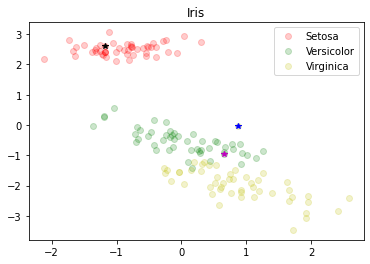

In [76]:
plt.plot(new_msd[:50,0],new_msd[:50,1],'or',alpha=0.2,label = 'Setosa')
plt.plot(new_msd[50:100,0],new_msd[50:100,1],'og',alpha=0.2,label = 'Versicolor')
plt.plot(new_msd[100:,0],new_msd[100:,1],'oy',alpha=0.2,label = 'Virginica')
plt.plot(new_msd[6,0],new_msd[6,1],'*k')
plt.plot(new_msd[56,0],new_msd[56,1],'*m')
plt.plot(new_msd[106,0],new_msd[106,1],'*b')
plt.legend()
plt.title('Iris'); 

##Pre-computed distance matrix

In [86]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [87]:
new_msd2 = mds.fit_transform(dis_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


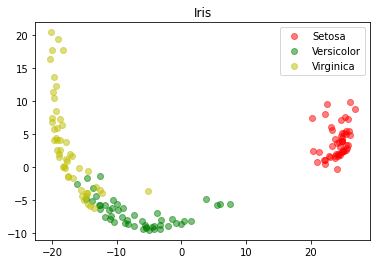

In [88]:
plt.plot(new_msd2[:50,0],new_msd2[:50,1],'or',alpha=0.5,label = 'Setosa')
plt.plot(new_msd2[50:100,0],new_msd2[50:100,1],'og',alpha=0.5,label = 'Versicolor')
plt.plot(new_msd2[100:,0],new_msd2[100:,1],'oy',alpha=0.5,label = 'Virginica')
plt.legend()
plt.title('Iris');